In [2]:
import cv2, glob, sys, os
import numpy as np
import pandas as pd
import numpy.random as rd
import scipy as sp
from scipy import stats as st
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'
import sys
import os

# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    from matplotlib import font_manager
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'

In [3]:
m   = [0, 0]
cov = [[1, 0.5],
       [0.4, 1]]
X = st.multivariate_normal.rvs(m, cov, size=50000)
df_X = pd.DataFrame(X, columns=["x", "y"])

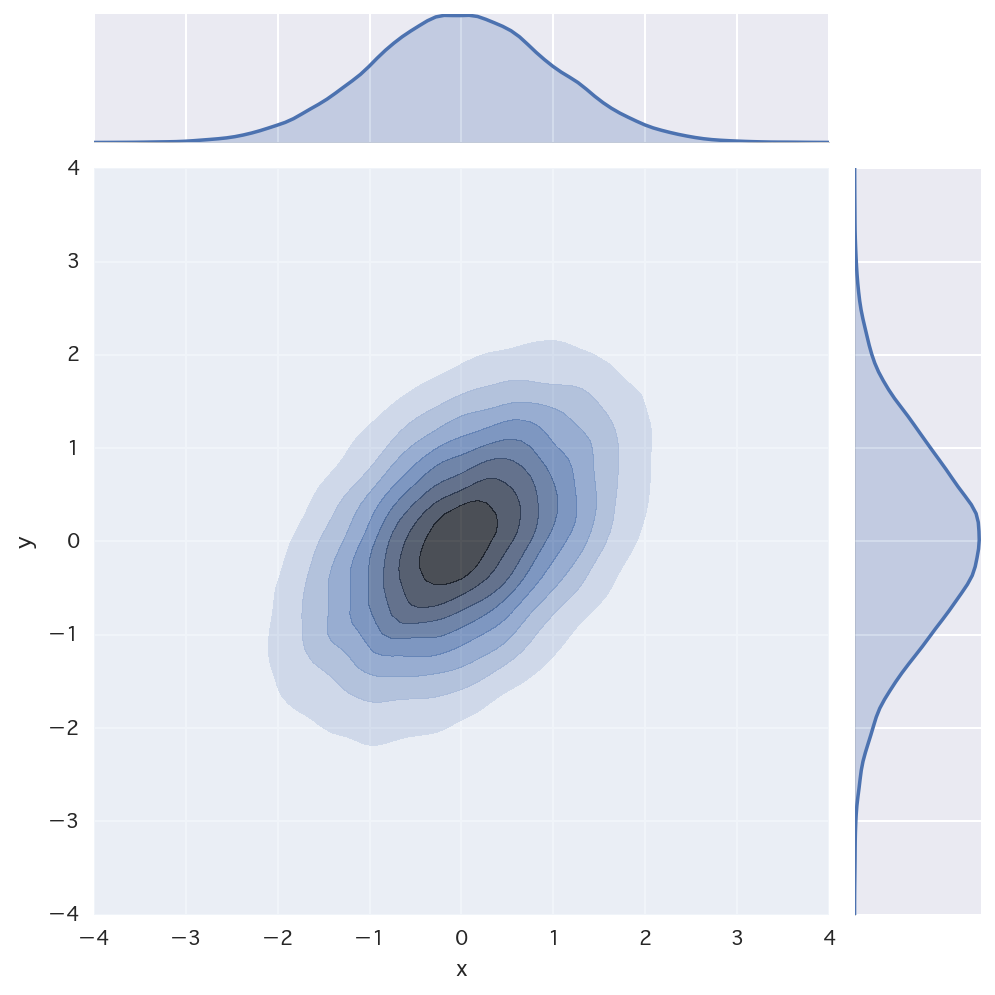

In [4]:
sns.jointplot("x", "y", data=df_X, kind="kde", size=7, stat_func=None, xlim=(-4,4), ylim=(-4,4), alpha=0.7)

In [5]:
m   = [4, 4]
cov = [[1, 0.5],
       [0.4, 1]]

area = 8/100*8/100
xx = np.linspace(0, 8, 101)
yy = np.linspace(0, 8, 101)
xy = np.meshgrid(xx, yy)
xx_flatten = xy[0].flatten()
yy_flatten = xy[1].flatten()
z = np.array([(t1**0.7)*(t2**0.8) for t1, t2 in zip(xx_flatten, yy_flatten)]).reshape(xy[0].shape)

In [6]:
pdf = np.array([st.multivariate_normal.pdf([t1, t2], m, cov) for t1, t2 in zip(xx_flatten, yy_flatten)]).reshape(xy[0].shape)

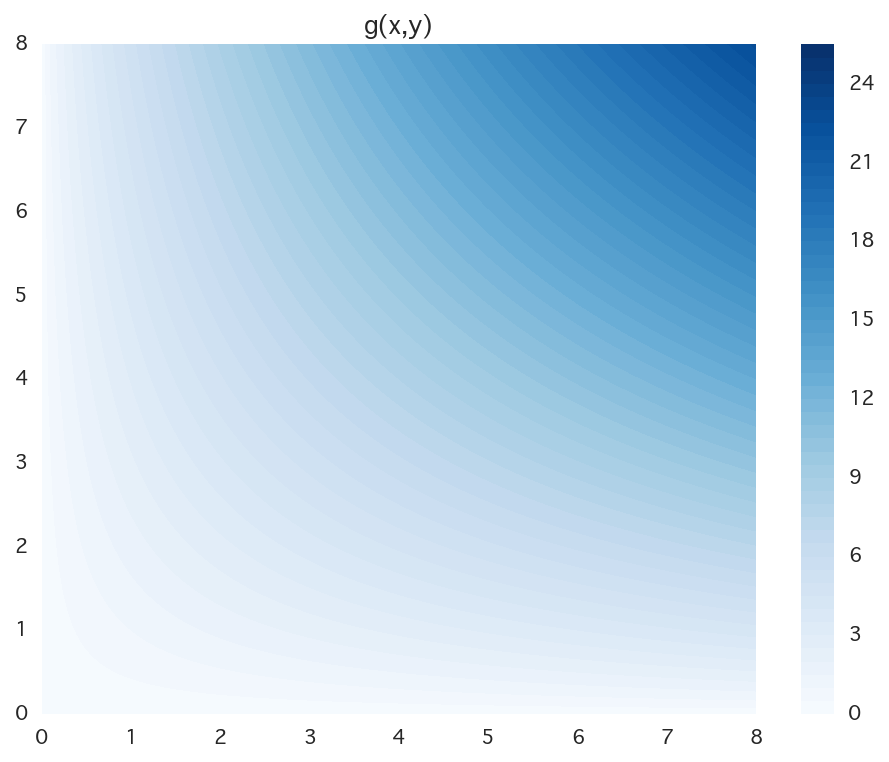

In [7]:
plt.figure(figsize=(8, 6))
ct1 = plt.contourf(xy[0], xy[1], z, levels=np.arange(0,26,0.5), cmap=cm.Blues)
plt.colorbar(ct1)
plt.xlim(0,8);plt.ylim(0,8)
plt.title("g(x,y)")

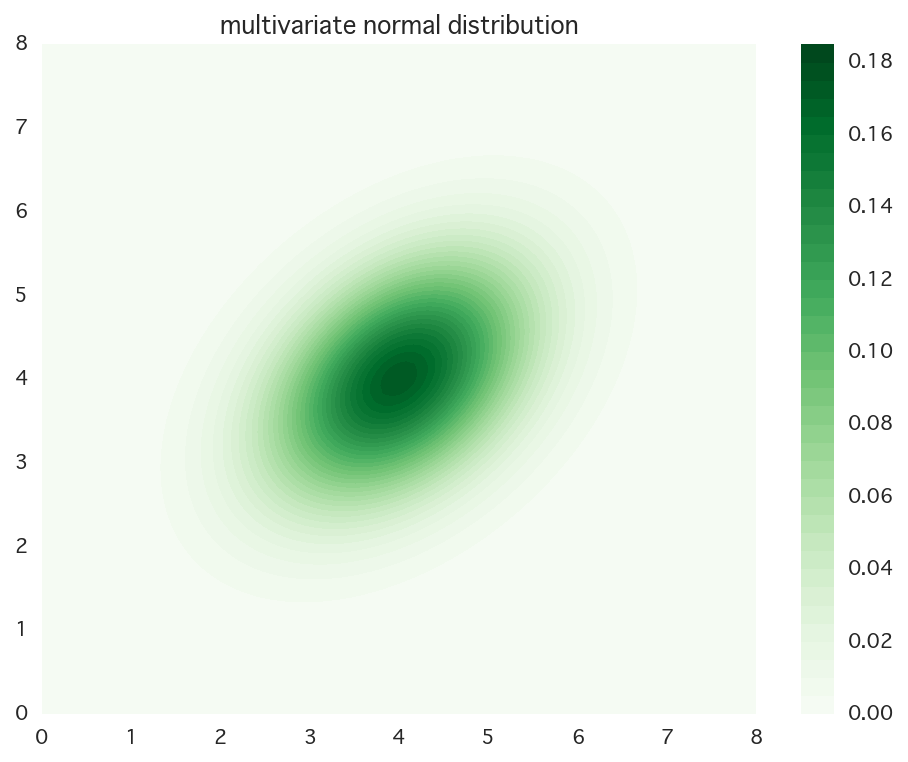

In [8]:
plt.figure(figsize=(8, 6))
ct2 = plt.contourf(xy[0], xy[1], pdf, levels=np.arange(0,0.19,0.005), cmap=cm.Greens)
plt.colorbar(ct2)
plt.xlim(0,8);plt.ylim(0,8)
plt.title("multivariate normal distribution")

In [9]:
np.sum([v1*v2 for v1, v2 in zip(z, pdf)])*area

8.0165736149043507

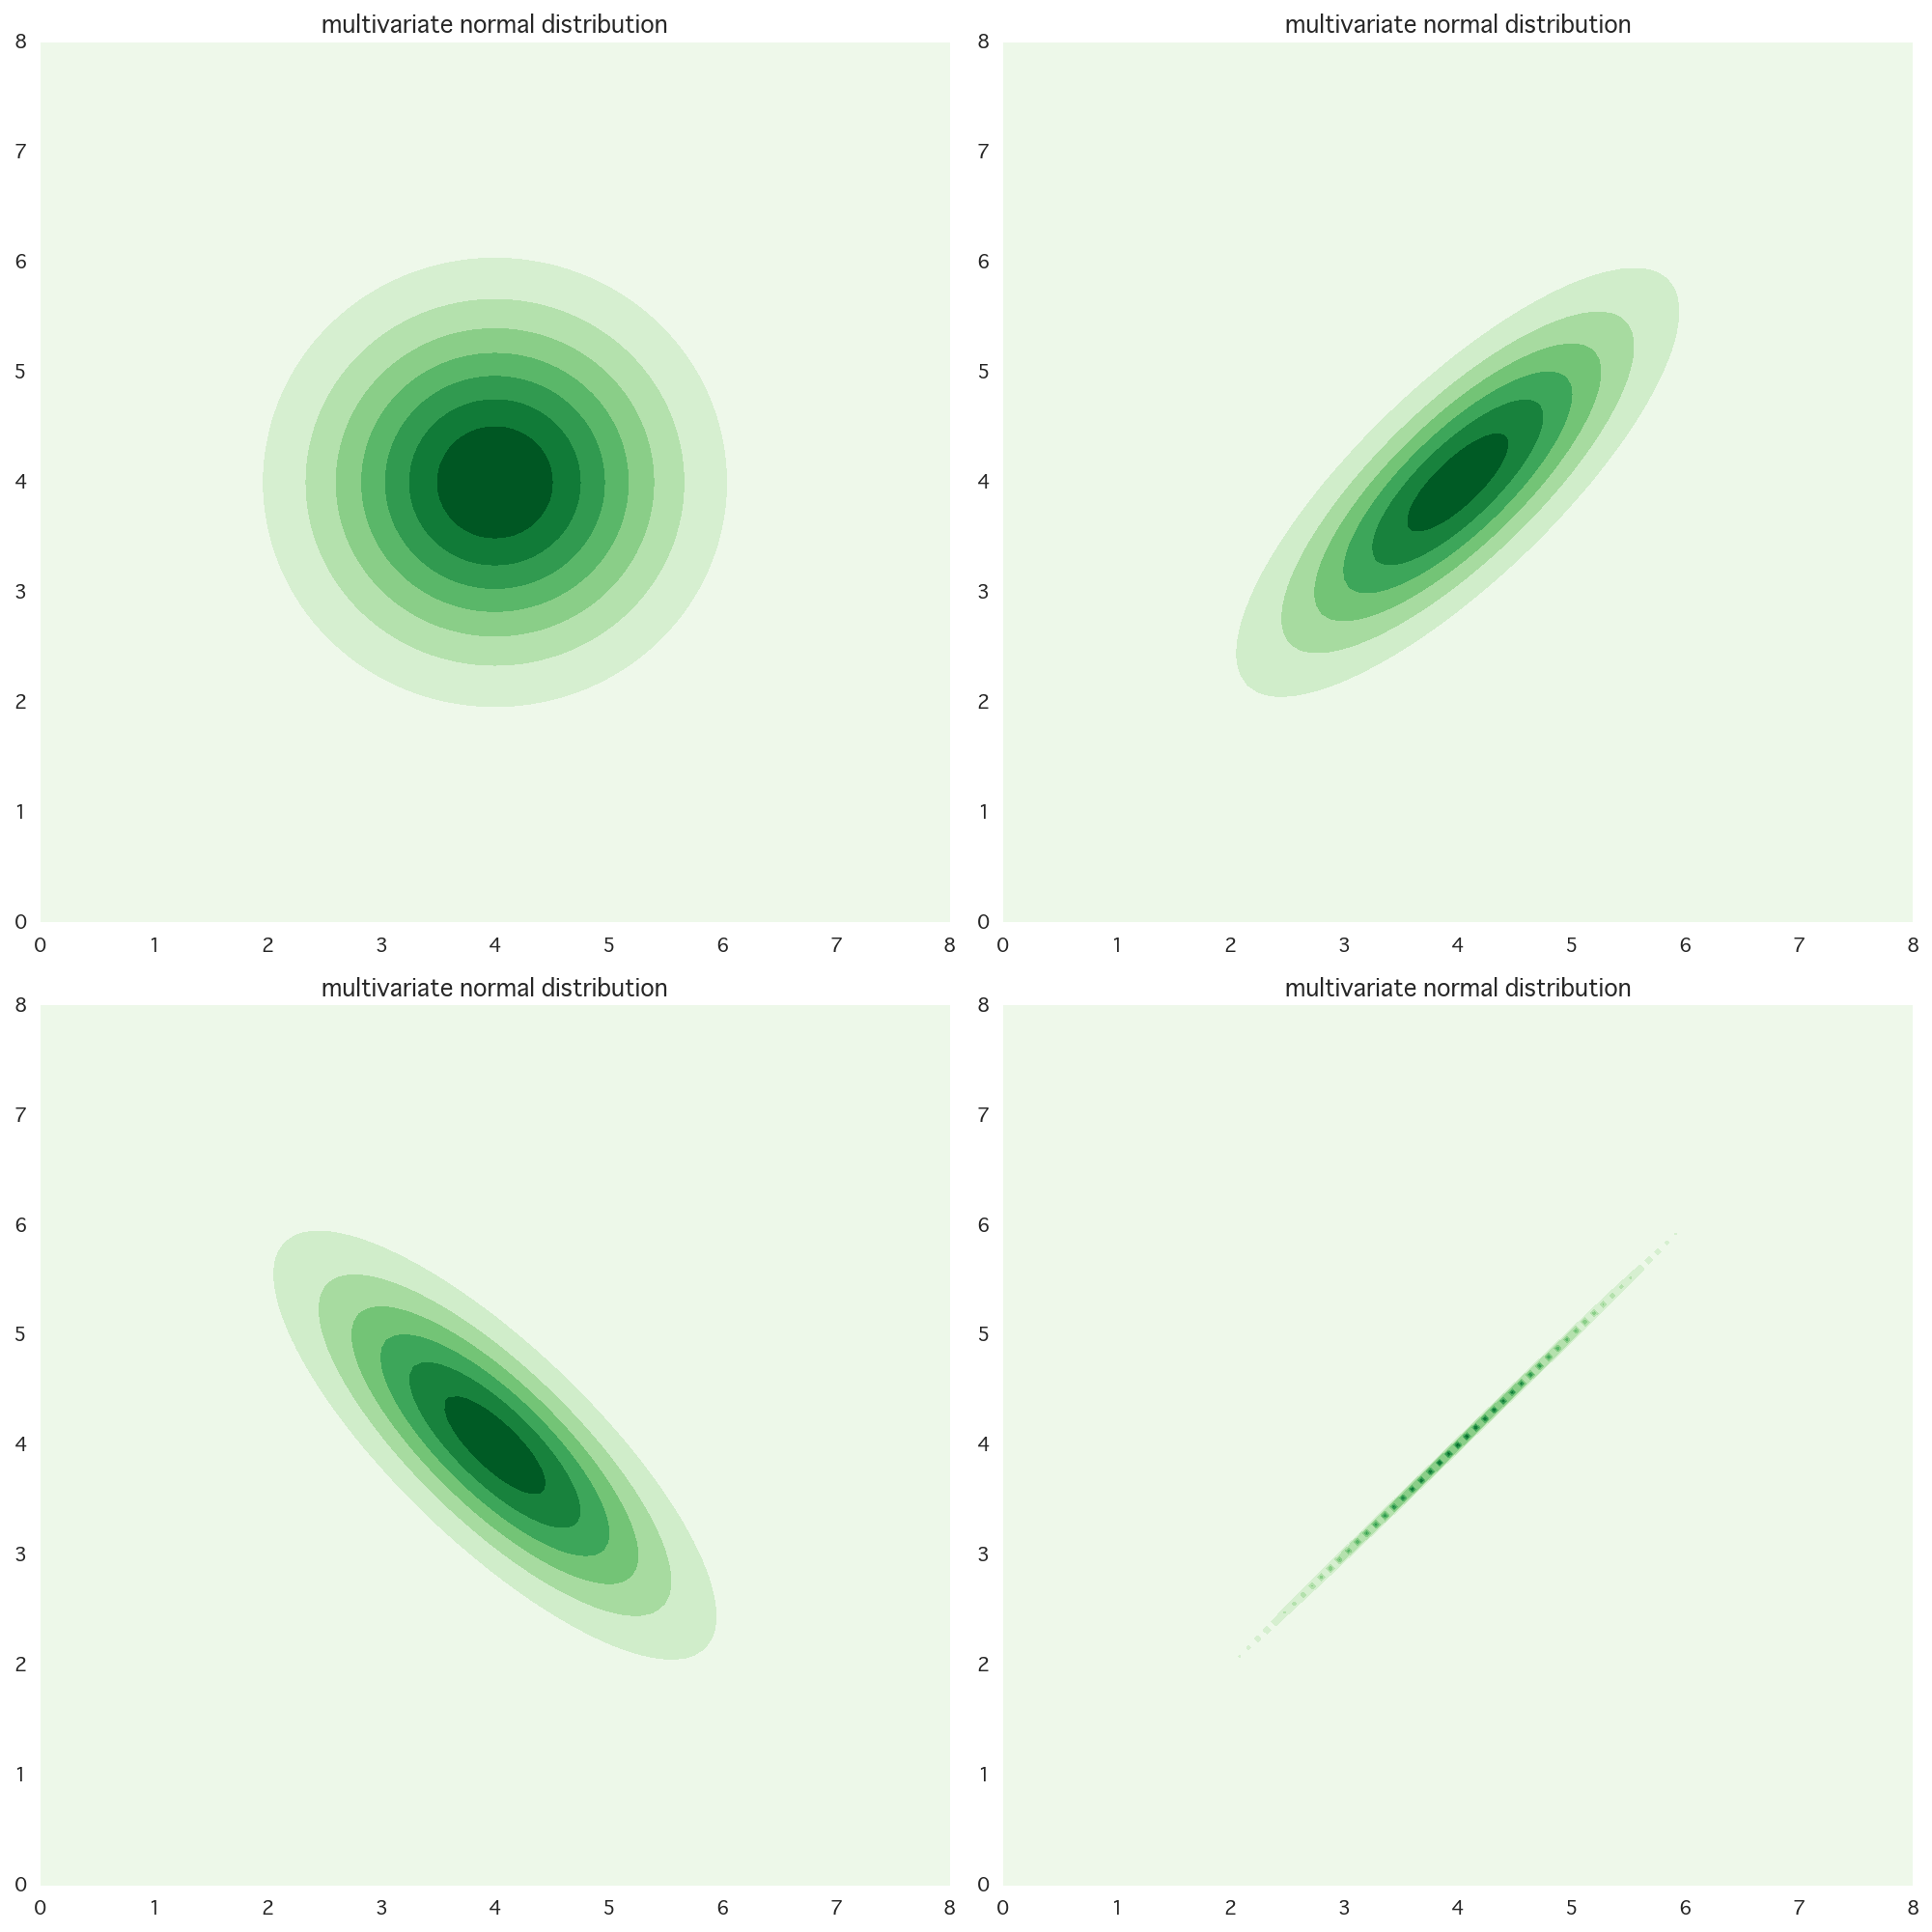

In [15]:
m   = [4, 4]
cov1 = [[1, 0],
        [0, 1]]
cov2 = [[  1, 0.8],
        [0.8,   1]]
cov3 = [[   1, -0.8],
        [-0.8,    1]]
cov4 = [[1,        1-0.1**9],
        [1-0.1**9,        1]]

xx = np.linspace(0, 8, 101)
yy = np.linspace(0, 8, 101)
xy = np.meshgrid(xx, yy)
xx_flatten = xy[0].flatten()
yy_flatten = xy[1].flatten()

plt.figure(figsize=(14, 14))
for i, c in enumerate([cov1, cov2, cov3, cov4]):
    pdf = np.array([st.multivariate_normal.pdf([t1, t2], m, c) for t1, t2 in zip(xx_flatten, yy_flatten)]).reshape(xy[0].shape)

    plt.subplot(2,2,i+1)
    ct = plt.contourf(xy[0], xy[1], pdf, cmap=cm.Greens)
    #plt.colorbar(ct)
    plt.xlim(0,8);plt.ylim(0,8)
    plt.title("multivariate normal distribution")
plt.tight_layout()